#Pandas DataFrames


**Pandas** ist eine Bibliothek in Python, die leistungsstarke Datenstrukturen wie DataFrames und Serien für die Datenanalyse und -manipulation bietet.

Ein **DataFrame** in Pandas ist wie eine Tabelle in einem Excel-Arbeitsblatt, in der Daten in Zeilen und Spalten organisiert sind, wobei jede Spalte unterschiedliche Arten von Informationen enthalten kann.

### **Tabelle in DataFrame laden**

In [ ]:
# Pandas Bibliothek laden
import pandas as pd

# URL der PKW-Frequenzdaten Tabelle 1
url = 'https://raw.githubusercontent.com/OJanz/PKW-Frequenzen/main/PKW-Frequenzen-Tab1.csv'

# Daten in Pandas DataFrame einlesen
df = pd.read_csv(url)

# Die ersten fünf Datensätze ausgeben
print(df.head(10))

### **Dataframe konsolidieren**
Wir wollen wissen, wie viele Fahrzeuge in Summe pro Kalenderwoche in den beiden Straßen unterwegs sind.


---

PROMPT: *Ich möchte ein Dataframe über die Spalte "Kalenderwoche" konsolidieren. Die anderen Spalten sollen über die "Kalenderwoche" ausfummiert werden. Bitte erstelle eine Codebeispiel in Python.*

---



In [ ]:
# DataFrame über die "Kalenderwoche" als Summe aggregieren
grouped_df = df.groupby('Kalenderwoche').agg({
    'Hauptstraße': 'sum',
    'Rathausstraße': 'sum'
    })

print(grouped_df)

               Hauptstraße  Rathausstraße
Kalenderwoche                            
40                     737           1126
41                     805           1214
42                     850           1246
43                     877           1140
44                     805           1193


In [ ]:
# Index einfügen und "Kalenderwoche" als Spalte erhalten
grouped_df = grouped_df.reset_index()
print(grouped_df)

   Kalenderwoche  Hauptstraße  Rathausstraße
0             40          737           1126
1             41          805           1214
2             42          850           1246
3             43          877           1140
4             44          805           1193


### **Filtern eines Dataframes**
Wir wollen die Daten filtern und uns ausschließlich die Daten der Wochentage Montag und Dienstag anschauen.


---
PROMPT: *Filtern eines Dataframes: Mein Dataframe enthält unter anderem eine Spalte mit dem Namen "Wochentag". Ich möchte ein Dataframe nach folgender Bedingung filtern: "Wochentag" = "Mo" **oder** "Wochentag" = "Di". Bitte erstelle einen Beispielcode in Python.*

---



In [ ]:
# Dataframe filtern nach Montag oder Dienstag
# --->   "|" das Zeichen bedeutet ODER. Tastenkombination: alt gr  <

filtered_df = df[(df['Wochentag'] == 'Mo') | (df['Wochentag'] == 'Di')]

# print the filtered DataFrame
print(filtered_df)

           Tag Wochentag  Kalenderwoche  Hauptstraße  Rathausstraße
0   02.10.2023        Mo             40           96            169
1   03.10.2023        Di             40           97            119
7   09.10.2023        Mo             41          134            214
8   10.10.2023        Di             41          126            171
14  16.10.2023        Mo             42          111            168
15  17.10.2023        Di             42          145            173
21  23.10.2023        Mo             43          124            157
22  24.10.2023        Di             43          142            163
28  30.10.2023        Mo             44          119            114
29  31.10.2023        Di             44          150            177


### **Dataframe ergänzen**
Wir haben die Daten für eine weitere Straße erhalten (Mierendorffstraße). Die Daten sind in der Datei PKW-Frequenzen-Tab2.csv auf Github gespeichert. Wir wollen unser bestehendes Dataframe um die neuen Daten ergänzen. Die Verknüpfung der beiden Tabellen ist über die Spalte "Tag" möglich.

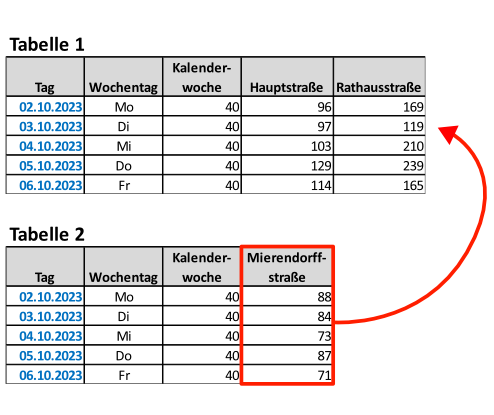


---

PROMPT: *Tabelle zusammenführen: Ich habe zwei Datframes (df und df2). Die Spalte "Tag" ist in beiden Dataframes enthalten. Ich möchte die beiden Dataframes über die Splate "Tag" in einem Dataframe zusammenführen. Bitte erstelle ein Codebeispiel in Python.*

---




In [ ]:
# Zweite Tabelle in das DataFrame df2 laden

# URL der PKW-Frequenzdaten Tabelle 2
url2 = 'https://raw.githubusercontent.com/OJanz/PKW-Frequenzen/main/PKW-Frequenzen-Tab2.csv'

# Daten in Pandas Data Frame laden
df2 = pd.read_csv(url2)

# Die ersten fünf Datensätze ausgeben
print(df2.head())

          Tag Wochentag  Kalenderwoche  Mierendorffstraße
0  02.10.2023        Mo             40                 88
1  03.10.2023        Di             40                 84
2  04.10.2023        Mi             40                 73
3  05.10.2023        Do             40                 87
4  06.10.2023        Fr             40                 71


In [ ]:
# Zusammenführen der Dataframes über die Spalte "Tag"
merged_df = pd.merge(df, df2, on="Tag")

print(merged_df.head())

          Tag Wochentag_x  Kalenderwoche_x  Hauptstraße  Rathausstraße  \
0  02.10.2023          Mo               40           96            169   
1  03.10.2023          Di               40           97            119   
2  04.10.2023          Mi               40          103            210   
3  05.10.2023          Do               40          129            239   
4  06.10.2023          Fr               40          114            165   

  Wochentag_y  Kalenderwoche_y  Mierendorffstraße  
0          Mo               40                 88  
1          Di               40                 84  
2          Mi               40                 73  
3          Do               40                 87  
4          Fr               40                 71  


**Problem:** Das neue Dataframe (merged_df) enthält die Spalten "Wochentag" und "Kalenderwoche" doppelt. Das müssen wir verhindern.

Wir fragen im selben Chat nach:



---


Prompt:  *Neben dem Feld "Tag" soll merge_df ausschließlich folgende Felder enthalten:*
- "Kalenderwoche" aus df
- "Wochentag" as df
- "Rathausstraße" aus df
- "Hauptstraße" as df
- "Mierendorffstraße" aus df2


*Bitte erstelle ein Codebeispiel in Python.*


---



In [ ]:
# Zusammenführen der Dataframes über die Spalte "Tag" und Auswahl der gewünschten Spalten
merged_df = pd.merge(df[['Tag', 'Kalenderwoche', 'Wochentag', 'Rathausstraße', 'Hauptstraße']],
                     df2[['Tag', 'Mierendorffstraße']],
                     left_on="Tag", right_on="Tag")

print(merged_df.head())

          Tag  Kalenderwoche Wochentag  Rathausstraße  Hauptstraße  \
0  02.10.2023             40        Mo            169           96   
1  03.10.2023             40        Di            119           97   
2  04.10.2023             40        Mi            210          103   
3  05.10.2023             40        Do            239          129   
4  06.10.2023             40        Fr            165          114   

   Mierendorffstraße  
0                 88  
1                 84  
2                 73  
3                 87  
4                 71  


#A U F G A B E N


###Aufgabe 1

Filter die Daten aus dem Notebook nach Sonntagen und gebe sie aus.

###Aufgabe 2

Ermittle im Notebook die durchschnittliche Frequenz je Straße. Nutze zur Hilfe dafür folgenden Prompt:



---


**PROMPT**

Ich habe ein Dataframe (merged_df) mit den drei Spalten 'Rathausstraße', 'Hauptstzraße' und 'Mierendorffstraße'. Bitte erzeuge einen Beispielcode, der das Arthmetische Mittel für jede Straße ermittelt.


---

###Aufgabe 3

Ermittle jetzt für jede Straße die maximale und die minimale Frequenz. Nutze wieder die KI zur Hilfe.